<a href="https://colab.research.google.com/github/VigilCiph3r/MALICIOUS-URL-CLASSIFIER/blob/main/Malicious_URL_Classiier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Malicious URLS Classifier**

Malicious URLs or malicious website is a very serious threat to cybersecurity. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and lure unsuspecting users to become victims of scams (monetary loss, theft of private information, and malware installation), and cause losses of billions of dollars every year. We have collected this dataset to include a large number of examples of Malicious URLs so that a machine learning-based model can be developed to identify malicious urls so that we can stop them in advance before infecting computer system or spreading through inteinternet.

**Business Understanding**

Malicious URL Classifiers are crucial for safeguarding users and organizations from a wide range of online threats. By identifying malicious websites, these classifiers help prevent users from accidentally clicking on links that could lead to malware infection, phishing attacks, or data theft. This not only protects individual users but also strengthens the overall cybersecurity posture of organizations by preventing compromised devices within their network.

Furthermore, Malicious URL Classifiers play a vital role in improving web browsing experiences. By filtering out malicious URLs, they can significantly reduce the number of deceptive websites encountered by users, enhancing online safety and trust. As cyberattacks constantly evolve, these classifiers act as a dynamic defense system, adapting to new threats and URL patterns to maintain a secure browsing environment.

In essence, Malicious URL Classifiers are essential tools for mitigating cybersecurity risks and promoting a safer online ecosystem for everyone.

In [ ]:
import numpy as np
import pandas as pd
import re
from urllib.parse import urlparse
import os.path

# Visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Balance Data
from imblearn.over_sampling import SMOTE

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier


# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

import pickle


# **DISK AND DATASET MOUNT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/content/malicious_url.csv")


In [ ]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df.tail()

,url,type
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing
651190,www.angelfire.com/goth/devilmaycrytonite/,phishing


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (651191, 2)


In [ ]:
df.keys()

Index(['url', 'type'], dtype='object')

In [ ]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [ ]:
df['url'].value_counts()

url
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css                         180
http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961    146
http://9779.info/%E6%A0%91%E5%8F%B6%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/                         91
http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/                                  88
http://www.js182.com/app/member/SportOption.php?uid=guest&langx=gb                               79
                                                                                               ... 
en.wikipedia.org/wiki/Montrealer                                                                  1
redbulgaria.com/                                                                                  1
news.ontario.ca/opo/en/2011/06/highway-417-expansion-moving-forward.html                          1
metal-archives.com/bands/Goddess_of_Desire/492                                                  

In [ ]:
n_samples, n_features = df.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 651191
Number of features: 2


In [ ]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
print(df)

                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]


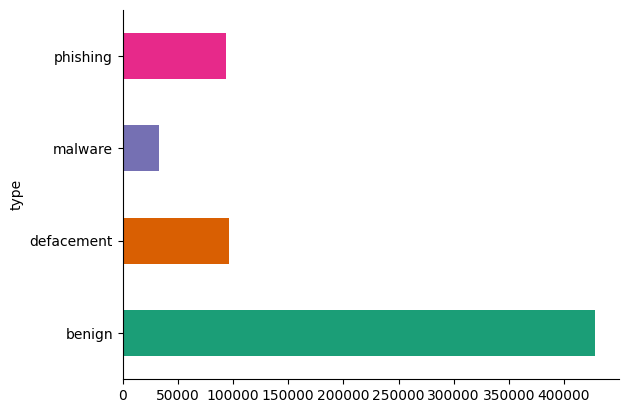

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Data Understanding**

This file consists of
 651,191 URLs,
out of which 428103 benign or safe URLs,
 96457 defacement URLs,
 94111 phishing URLs,
 and 32520 malware URLs.
 It has two columns comprising of url and a type which signifies the class of maliciousness



# **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


We now know:

The dataset is constituted of 651191 rows and 2 columns;

There are no missing values;
All the columns contain only Alphernumeric.


In [ ]:
# statistical analysis of the dataset
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [ ]:
# Features under type column
df['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

# **DATA PREPROCESSING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["class_url"] = lb_make.fit_transform(df["type"])
df["class_url"].value_counts()

class_url
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [ ]:
def url_length(url):
    return len(str(url))

df['url_length'] = df['url'].apply(lambda i: url_length(i))
df

,url,type,class_url,url_length
0,br-icloud.com.br,phishing,3,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45


In [ ]:
from urllib.parse import urlparse

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))
df

,url,type,class_url,url_length,hostname_length
0,br-icloud.com.br,phishing,3,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0


In [ ]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))
df

,url,type,class_url,url_length,hostname_length,count-www
0,br-icloud.com.br,phishing,3,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0


In [ ]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [ ]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,0,0,0,0,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,0,2,0,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,0,0,0,0,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,0,0,0,0,2,0


In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [ ]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
 from tld import get_tld

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0,0,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0,0,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0,0,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0,0,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0,0,9,net,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,0,0,0,0,3,0,0,7,None,-1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,0,2,0,0,4,0,1,8,None,-1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,0,0,0,0,4,0,1,7,None,-1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,0,0,0,0,2,0,0,4,None,-1


from matplotlib import pyplot as plt
df['class_url'].plot(kind='hist', bins=20, title='class_url')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['url_length'].plot(kind='hist', bins=20, title='url_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['hostname_length'].plot(kind='hist', bins=20, title='hostname_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['count-www'].plot(kind='hist', bins=20, title='count-www')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='class_url', y='url_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='url_length', y='hostname_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='hostname_length', y='count-www', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='count-www', y='count-https', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['abnormal_url']
  ys = series['class_url']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('abnormal_url', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('abnormal_url')
_ = plt.ylabel('class_url')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['abnormal_url']
  ys = series['url_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('abnormal_url', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('abnormal_url')
_ = plt.ylabel('url_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['abnormal_url']
  ys = series['hostname_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('abnormal_url', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('abnormal_url')
_ = plt.ylabel('hostname_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['abnormal_url']
  ys = series['count-www']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('abnormal_url', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('abnormal_url')
_ = plt.ylabel('count-www')

from matplotlib import pyplot as plt
df['class_url'].plot(kind='line', figsize=(8, 4), title='class_url')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['url_length'].plot(kind='line', figsize=(8, 4), title='url_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['hostname_length'].plot(kind='line', figsize=(8, 4), title='hostname_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['count-www'].plot(kind='line', figsize=(8, 4), title='count-www')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='class_url', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='url_length', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='hostname_length', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='count-www', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']=df['url'].apply(lambda i: letter_count(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,0,0,0,None,-1,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,2,0,0,5,None,-1,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,3,0,0,7,None,-1,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,1,0,0,9,be,2,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,1,0,0,9,net,3,0,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,3,0,0,7,None,-1,0,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,0,4,0,1,8,None,-1,0,7,29
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,0,4,0,1,7,None,-1,0,3,33
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,2,0,0,4,None,-1,0,0,36


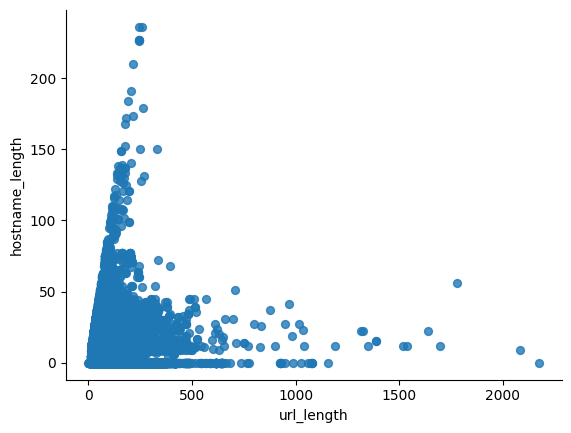

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='url_length', y='hostname_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,0,0,None,-1,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,2,0,0,5,None,-1,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,3,0,0,7,None,-1,0,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,1,0,0,9,be,2,0,7,63,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,1,0,0,9,net,3,0,22,199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,3,0,0,7,None,-1,0,12,21,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,4,0,1,8,None,-1,0,7,29,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,4,0,1,7,None,-1,0,3,33,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,2,0,0,4,None,-1,0,0,36,0


In [ ]:
#Use of IP or not in domain
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,0,None,-1,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,5,None,-1,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,7,None,-1,0,1,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,0,9,be,2,0,7,63,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,0,9,net,3,0,22,199,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,0,7,None,-1,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,0,1,8,None,-1,0,7,29,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,0,1,7,None,-1,0,3,33,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,0,4,None,-1,0,0,36,0,0


In [ ]:
df['use_of_ip_address'].value_counts()

use_of_ip_address
0    643898
1      7293
Name: count, dtype: int64

In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,None,-1,0,0,13,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,5,None,-1,0,1,29,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,7,None,-1,0,1,25,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,9,be,2,0,7,63,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,9,net,3,0,22,199,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,7,None,-1,0,12,21,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,1,8,None,-1,0,7,29,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,1,7,None,-1,0,3,33,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,4,None,-1,0,0,36,0,0,1


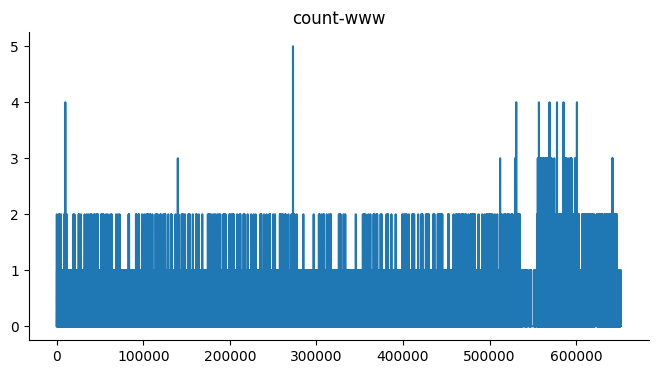

In [ ]:
from matplotlib import pyplot as plt
df['count-www'].plot(kind='line', figsize=(8, 4), title='count-www')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from googlesearch import search
def abnormal_url(url):
    site = search(url, 5)
    return 1 if site else 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,None,-1,0,0,13,1,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,5,None,-1,0,1,29,1,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,7,None,-1,0,1,25,1,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,9,be,2,0,7,63,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,9,net,3,0,22,199,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,7,None,-1,0,12,21,1,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,1,8,None,-1,0,7,29,1,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,1,7,None,-1,0,3,33,1,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,4,None,-1,0,0,36,1,0,1


In [ ]:
df.isnull().sum()

url                        0
type                       0
class_url                  0
url_length                 0
hostname_length            0
count-www                  0
count-https                0
count-http                 0
count.                     0
count%                     0
count?                     0
count-                     0
count=                     0
count@                     0
count_dir                  0
count_embed_domian         0
short_url                  0
fd_length                  0
tld                   475281
tld_length                 0
sus_url                    0
count-digits               0
count-letters              0
abnormal_url               0
use_of_ip_address          0
google_index               0
dtype: int64

In [ ]:
df.shape

(651191, 26)

# **Model Training and Testing**

We will apply 5 machine learning algorithms for classification in this section. Since we have already resampled the dataset.

Logistic Regression

KNeighborsClassifier

GaussianNB

DecisionTreeClassifie

RandomForestClassifier

In [ ]:
X = df[['use_of_ip_address','abnormal_url', 'google_index', 'count-www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
           'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters']]

y = df['class_url']

In [ ]:
X

,use_of_ip_address,abnormal_url,google_index,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,1,1,0,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,1,1,0,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,1,1,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,1,0,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,0,1,1,0,0,3,0,0,0,0,...,0,0,0,39,0,0,7,-1,12,21
651187,0,1,1,0,0,4,0,1,0,0,...,0,2,0,44,0,0,8,-1,7,29
651188,0,1,1,1,0,4,0,1,0,0,...,0,0,0,42,0,0,7,-1,3,33
651189,0,1,1,0,0,2,0,0,0,0,...,0,0,0,45,0,0,4,-1,0,36


In [ ]:
y

0         3
1         0
2         0
3         1
4         1
         ..
651186    3
651187    3
651188    3
651189    3
651190    3
Name: class_url, Length: 651191, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)



In [ ]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (520952, 21)
Y_train Shape : (520952,)
X_test  Shape : (130239, 21)
Y_test  Shape : (130239,)


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(max_iter=1000, random_state=0)
classifier1.fit(X_train.values, y_train.values)
y_pred1 = classifier1.predict(X_test.values)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Model Evaluation**




# **Logistic Regression confusion Matrix**

> Indented block



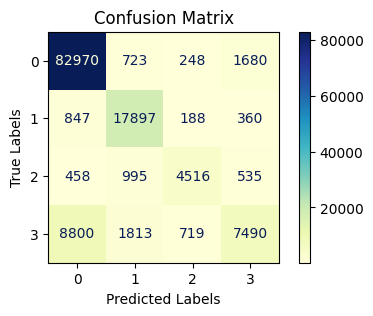

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 # computed confusion matrix cm1
#cm1 = confusion_matrix(y_true, y_pred1, labels=lr_model.classes_)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 3))

y_pred1 = classifier1.predict(X_test.values)

# Generate confusion matrix display
y_pred1 = classifier1.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred1, labels=classifier1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier1.classes_)
disp.plot(ax=ax, cmap='YlGnBu')  #colormap

# Set labels, title, and other parameters
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, fbeta_score

# Compute recall score
r_lgt = recall_score(y_test, y_pred1, average='weighted')
print("Recall Score1:", r_lgt)

# Compute precision score
p_lgt = precision_score(y_test, y_pred1, average='weighted')
print("Precision Score1:", p_lgt)

# Compute F1 score
f1_lgt = f1_score(y_test, y_pred1, average='weighted')
print("F1 Score1:", f1_lgt)

# Compute F2 score
f2_lgt = fbeta_score(y_test, y_pred1, beta=2, average='weighted')
print("F2 Score1:", f2_lgt)

# Compute accuracy score
A_lgt = accuracy_score(y_test, y_pred1)
print("Accuracy Score1:", A_lgt)


Recall Score1: 0.8666605241133608
Precision Score1: 0.8570722104952537
F1 Score1: 0.8526846404220361
F2 Score1: 0.8595929862959902
Accuracy Score1: 0.8666605241133608


# **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(metric='euclidean')
classifier2.fit(X_train.values, y_train.values)
y_pred2 = classifier2.predict(X_test.values)

# **Model Evaluation**




# **KNeighborsClassifier Confusion Matrix**

> Indented block



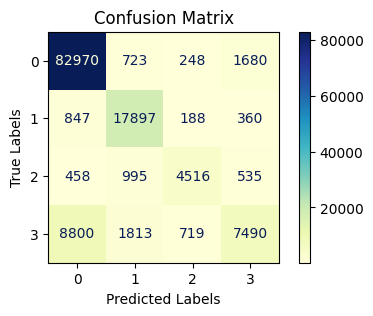

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 # computed confusion matrix cm1
#cm2 = confusion_matrix(y_true, y_pred1, labels=lr_model.classes_)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 3))

# Generate confusion matrix display
y_pred2 = classifier2.predict(X_test.values)
cm2 = confusion_matrix(y_test, y_pred2, labels=classifier2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier2.classes_)
disp.plot(ax=ax, cmap='YlGnBu')  #colormap

# Set labels, title, and other parameters
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, fbeta_score

# Compute recall score
r_knn = recall_score(y_test, y_pred2, average='weighted')
print("Recall Score2:", r_knn)

# Compute precision score
p_knn = precision_score(y_test, y_pred2, average='weighted')
print("Precision Score2:", p_knn)

# Compute F1 score
f1_knn = f1_score(y_test, y_pred2, average='weighted')
print("F1 Score2:", f1_knn)

# Compute F2 score
f2_knn = fbeta_score(y_test, y_pred2, beta=2, average='weighted')
print("F2 Score2:", f2_knn)

# Compute accuracy score
A_knn = accuracy_score(y_test, y_pred2)
print("Accuracy Score2: ", A_knn)


Recall Score2: 0.9439184883176315
Precision Score2: 0.9424848080268071
F1 Score2: 0.9421004921997332
F2 Score2: 0.9429535108682418
Accuracy Score2:  0.9439184883176315


# GaussianNB

> Indented block



In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier3 = GaussianNB()
classifier3.fit(X_train.values, y_train.values)
y_pred3 = classifier3.predict(X_test.values)

# **Model Evaluation**


# **GaussianNB Confusion Matrix**

> Indented block



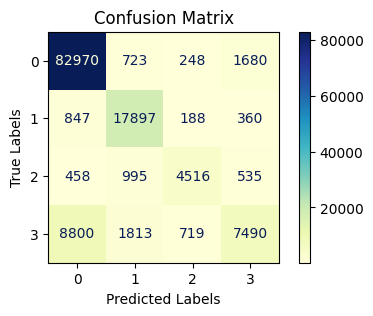

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 # computed confusion matrix cm1
#cm1 = confusion_matrix(y_true, y_pred1, labels=lr_model.classes_)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 3))

# Generate confusion matrix display
y_pred3 = classifier3.predict(X_test.values)
cm3 = confusion_matrix(y_test, y_pred3, labels=classifier3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier3.classes_)
disp.plot(ax=ax, cmap='YlGnBu')  # colormap

# Set labels, title, and other parameters
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, fbeta_score

# Compute recall score
r_nb = recall_score(y_test, y_pred3, average='weighted')
print("Recall Score3:", r_nb)

# Compute precision score
p_nb = precision_score(y_test, y_pred3, average='weighted')
print("Precision Score3:", p_nb)

# Compute F1 score
f1_nb = f1_score(y_test, y_pred3, average='weighted')
print("F1 Score3:", f1_nb)

# Compute F2 score
f2_nb = fbeta_score(y_test, y_pred3, beta=2, average='weighted')
print("F2 Score3:", f2_nb)

# Compute accuracy score
A_nb = accuracy_score(y_test, y_pred3)
print("Accuracy Score3:", A_nb)


Recall Score3: 0.8175738450080237
Precision Score3: 0.8253390845887077
F1 Score3: 0.8087714748775783
F2 Score3: 0.8111564631859848
Accuracy Score3: 0.8175738450080237


# **DecisionTree**
> Indented block


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier4.fit(X_train.values, y_train.values)
y_pred4 = classifier4.predict(X_test.values)

# **Model Evaluation**

# **DecisionTree Confusion Matrix**




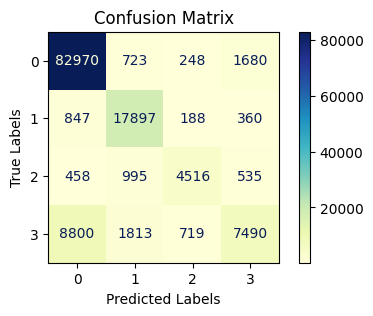

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 3))

# Generate confusion matrix display
y_pred4 = classifier4.predict(X_test.values)
cm4 = confusion_matrix(y_test, y_pred4, labels=classifier4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier4.classes_)
disp.plot(ax=ax, cmap='YlGnBu')  # colormap
# Set labels, title, and other parameters
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, fbeta_score

# Compute recall score
r_dt = recall_score(y_test, y_pred4, average='weighted')
print("Recall Score4:", r_dt)

# Compute precision score
p_dt = precision_score(y_test, y_pred4, average='weighted')
print("Precision Score4", p_dt)

# Compute F1 score
f1_dt = f1_score(y_test, y_pred4, average='weighted')
print("F1 Score4", f1_dt)

# Compute F2 score
f2_dt = fbeta_score(y_test, y_pred4, beta=2, average='weighted')
print("F2 Score4:", f2_dt)

# Compute accuracy score
A_dt = accuracy_score(y_test, y_pred4)
print("Accuracy Score4: ", A_dt)



Recall Score4: 0.9553666720414008
Precision Score4 0.9546565620735391
F1 Score4 0.9549186985391226
F2 Score4: 0.9551658694209817
Accuracy Score4:  0.9553666720414008


# **Random Forest Classifier**

# **Model Evaluation**

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators=100,max_features='sqrt')
classifier5.fit(X_train.values,y_train.values)
y_pred5 = classifier5.predict(X_test.values)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, fbeta_score

# Compute recall score
r_rf = recall_score(y_test, y_pred5, average='weighted')
print("Recall Score5:", r_rf)

# Compute precision score
p_rf = precision_score(y_test, y_pred5, average='weighted')
print("Precision Score5:", p_rf)

# Compute F1 score
f1_rf = f1_score(y_test, y_pred5, average='weighted')
print("F1 Score5:", f1_rf)

# Compute F2 score
f2_rf = fbeta_score(y_test, y_pred5, beta=2, average='weighted')
print("F2 Score5:", f2_rf)

# Compute accuracy score
A_rf = accuracy_score(y_test, y_pred5)
print("Accuracy Score5:", A_rf)


Recall Score5: 0.964258017951612
Precision Score5: 0.9637167713242142
F1 Score5: 0.9638267173377076
F2 Score5: 0.9640481972031066
Accuracy Score5: 0.964258017951612


## GENERAL MODEL EVALUATION (BEST MODEL SELECTION)

In [ ]:
# Define the model names
compare_models = ['Logistic Regression', 'KNeighborsClassifier', 'GaussianNB', 'RandomForestClassifier', 'DecisionTreeClassifier']

# Create DataFrame
data = {
    'Model': compare_models,
    'Accuracy': [A_lgt, A_knn, A_nb, A_rf, A_dt],
    'Recall': [r_lgt, r_knn, r_nb, r_rf, r_dt],
    'Precision': [p_lgt, p_knn, p_nb, p_rf, p_dt],
    'F1 Score': [f1_lgt, f1_knn, f1_nb, f1_rf, f1_dt],
    'F2 Score': [f2_lgt, f2_knn, f2_nb, f2_rf, f2_dt],
    'Description': ['', '', '', 'best model', '']
}

result = pd.DataFrame(data=data)
result



,Model,Accuracy,Recall,Precision,F1 Score,F2 Score,Description
0,Logistic Regression,0.943918,0.943918,0.942485,0.942100,0.942954,
1,KNeighborsClassifier,0.943918,0.943918,0.942485,0.942100,0.942954,
2,GaussianNB,0.817574,0.817574,0.825339,0.808771,0.811156,
3,RandomForestClassifier,0.964258,0.964258,0.963717,0.963827,0.964048,best model
4,DecisionTreeClassifier,0.955367,0.955367,0.954657,0.954919,0.955166,


<Axes: xlabel='Model', ylabel='F1 Score'>

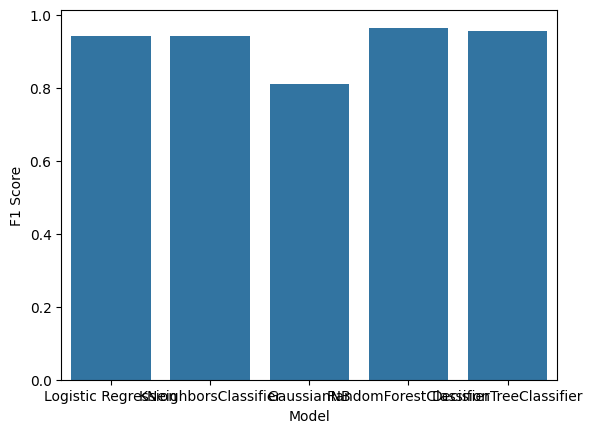

In [ ]:
# @title Model F1 Score Comparison

sns.barplot(x="Model", y="F1 Score", data=result)

# **Class Prediction**

In [ ]:
def get_url(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))

    return status

In [ ]:
def model_predict1(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier1.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict2(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier2.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res
def model_predict3(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier3.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict4(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier4.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict5(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier5.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

In [ ]:

!pip freeze > requirements.txt


In [ ]:
urls = ['www.kaggle.com',
        'en.wikipedia.org/wiki/Main_Page',
        'http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15',
        'bopsecrets.org/rexroth/cr/1.htm',
       'www.stackoverflow.com/questions/',
       'www.google.com/','www.angelfire.com/goth/devilmaycrytonite/',
        'br-icloud.com.br']
print("----------------------------------------------")
print("LogisticRegression")
for url in urls:
     print(model_predict1(url))

print("----------------------------------------------")
print("KNeighborsClassifier")
for url in urls:
     print(model_predict2(url))

print("----------------------------------------------")
print("GaussianNB")
for url in urls:
     print(model_predict3(url))

print("----------------------------------------------")
print("DecisionTreeClassifier")
for url in urls:
     print(model_predict4(url))

print("----------------------------------------------")
print("RandomForest")
for url in urls:
     print(model_predict5(url))

----------------------------------------------
LogisticRegression
Malware
Malware
Malware
Bening
Malware
Malware
Malware
Malware
----------------------------------------------
KNeighborsClassifier
Malware
Malware
Malware
Malware
Malware
Malware
Malware
Malware
----------------------------------------------
GaussianNB
Malware
Malware
Malware
Malware
Malware
Malware
Malware
Malware
----------------------------------------------
DecisionTreeClassifier
Bening
Malware
Phising
Malware
Bening
Bening
Bening
Malware
----------------------------------------------
RandomForest
Bening
Bening
Defacement
Bening
Bening
Bening
Bening
Malware
